# Códigos de señales 

## ECG

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import filtfilt,lfilter, freqz

### 1. Reposo

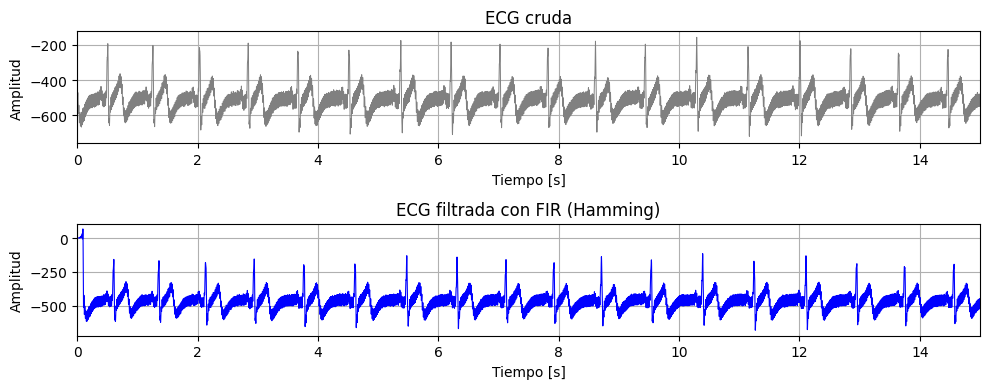

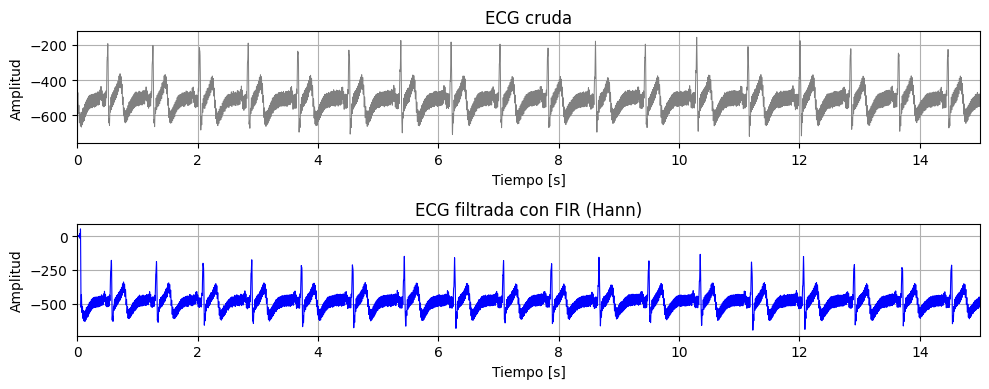

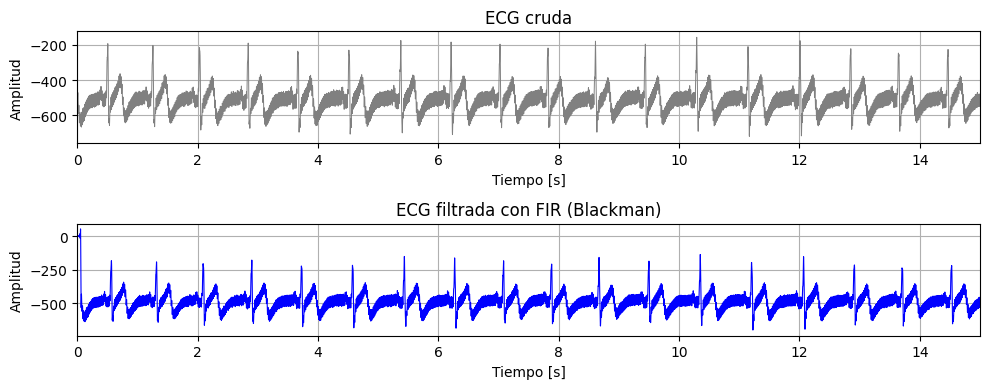

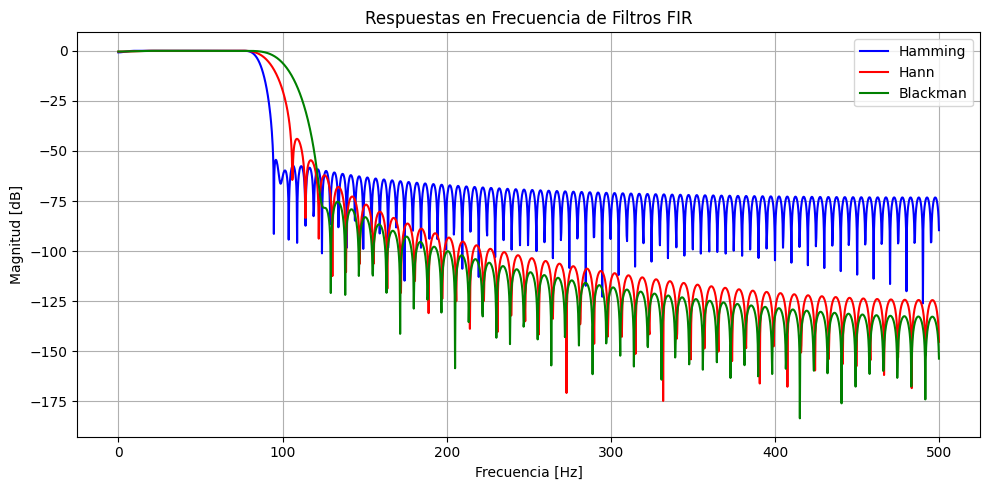

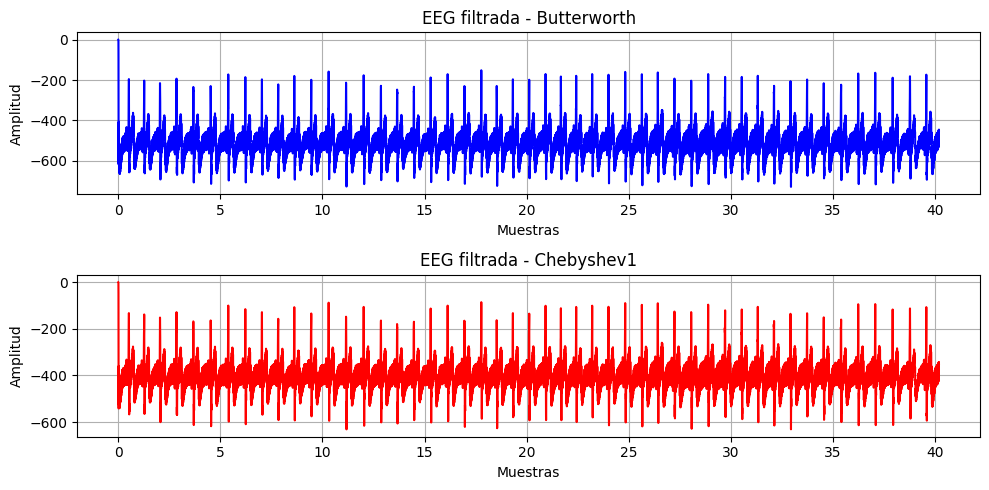

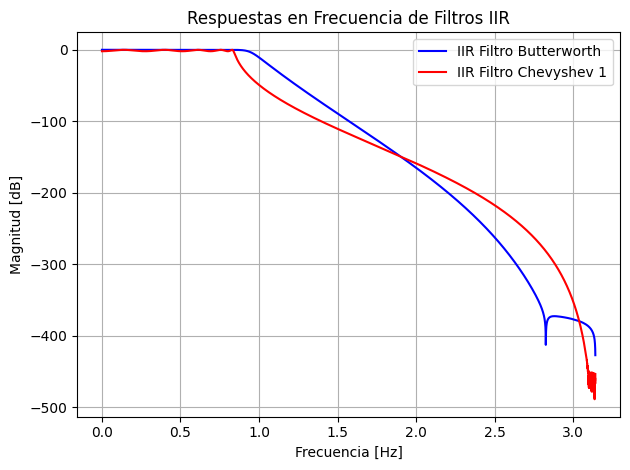

In [70]:
# Leer archivo de señal
ruta= "D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/reposo1.txt"
with open(ruta, "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

ecg = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs

#FILTROS FIR
#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
coef1="D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/FIR_hamming.csv"
coef2="D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/FIR_hann.csv"
coef3="D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/FIR_blackman.csv"
h = pd.read_csv(coef1, names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv(coef2, names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv(coef3, names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
ecg_filtrada = lfilter(h, 1.0, ecg)
# Filtrar señal con el FIR Hann
ecg_filtrada1 = lfilter(hann, 1.0, ecg)
# Filtrar señal con el FIR blackman
ecg_filtrada2 = lfilter(blackm, 1.0, ecg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-CHEV1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
ecg_butter = lfilter(b1, a1, ecg)
ecg_chevy  = lfilter(b2, a2, ecg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, ecg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, ecg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()







### 2. Apnea 10 segundos

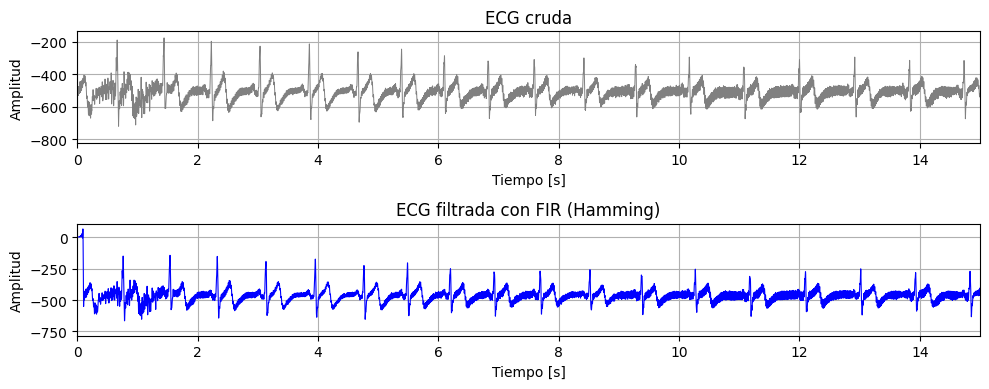

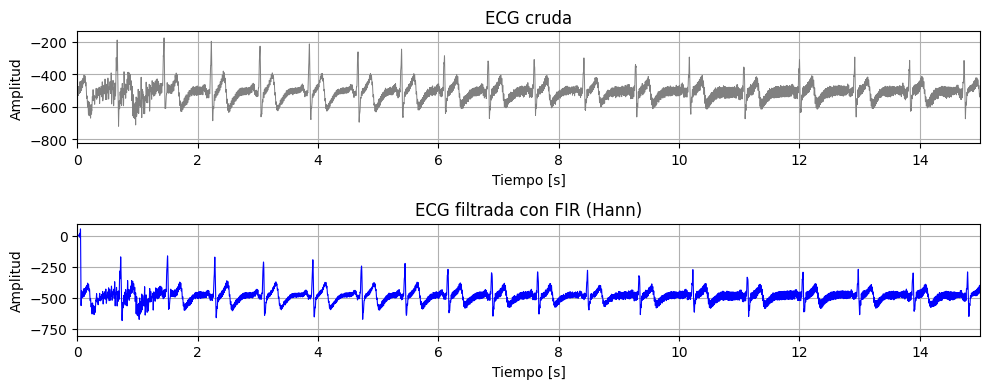

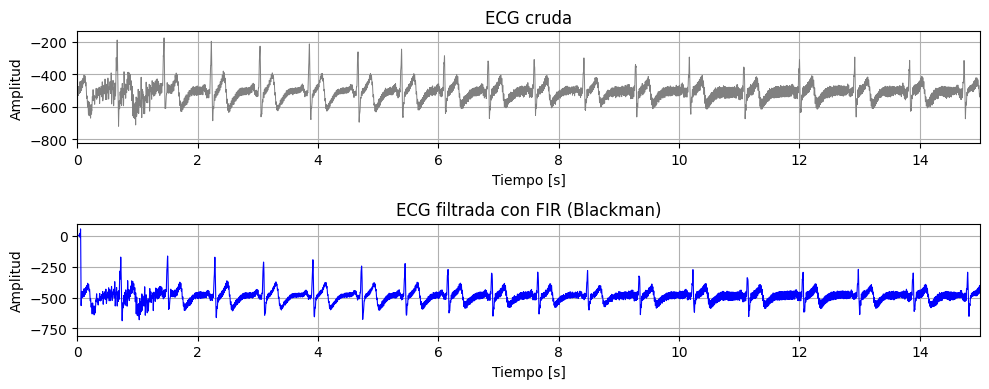

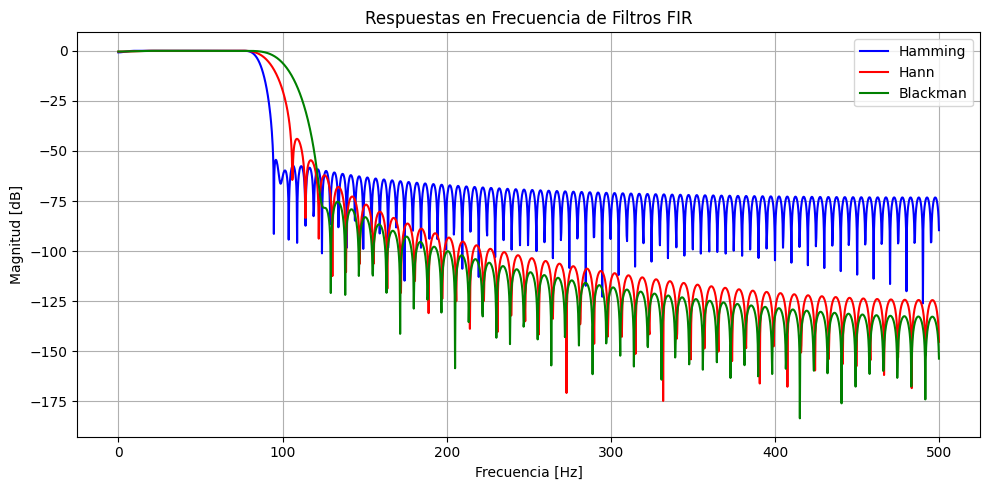

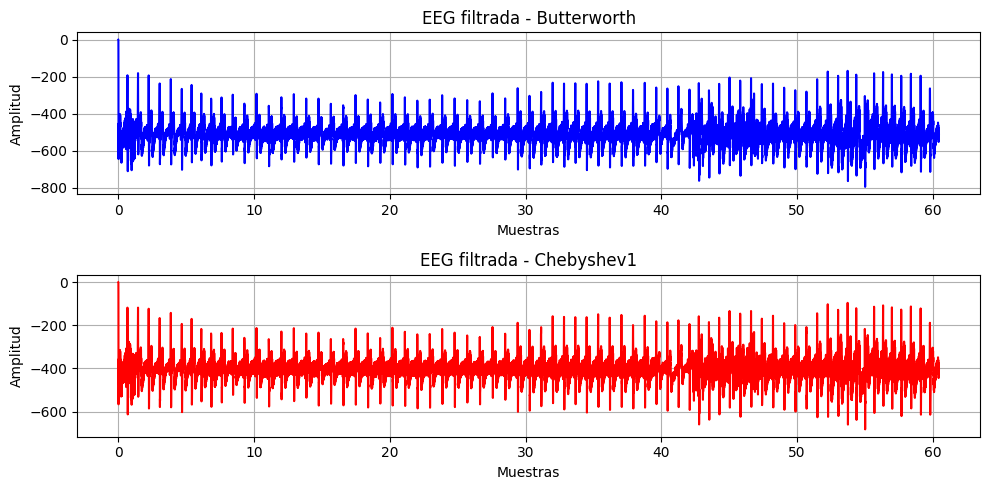

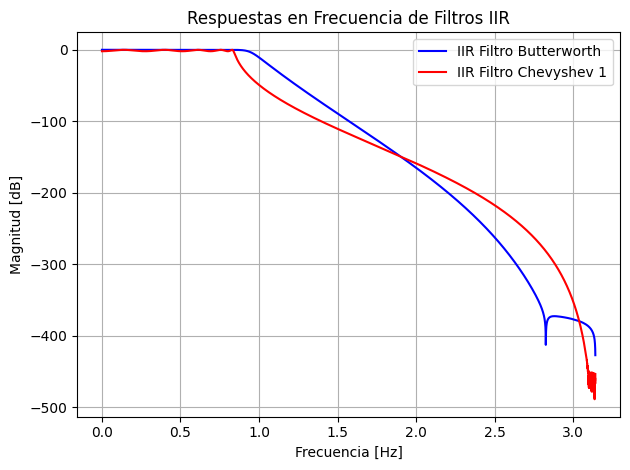

In [71]:
# Leer archivo de señal
with open("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/apnea_10seg_toma1.txt", "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

ecg = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs

#FILTROS FIR
#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
h = pd.read_csv(coef1, names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv(coef2, names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv(coef3, names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
ecg_filtrada = lfilter(h, 1.0, ecg)
# Filtrar señal con el FIR Hann
ecg_filtrada1 = lfilter(hann, 1.0, ecg)
# Filtrar señal con el FIR blackman
ecg_filtrada2 = lfilter(blackm, 1.0, ecg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-CHEV1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
ecg_butter = lfilter(b1, a1, ecg)
ecg_chevy  = lfilter(b2, a2, ecg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, ecg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, ecg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 3. Actividad aeróbica

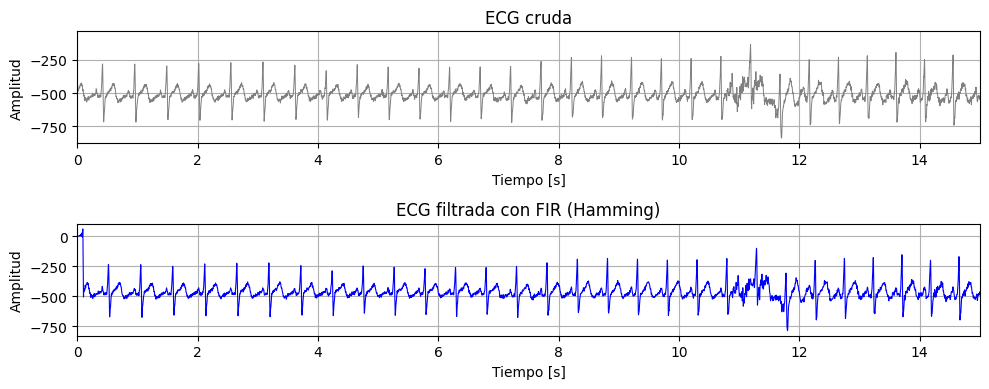

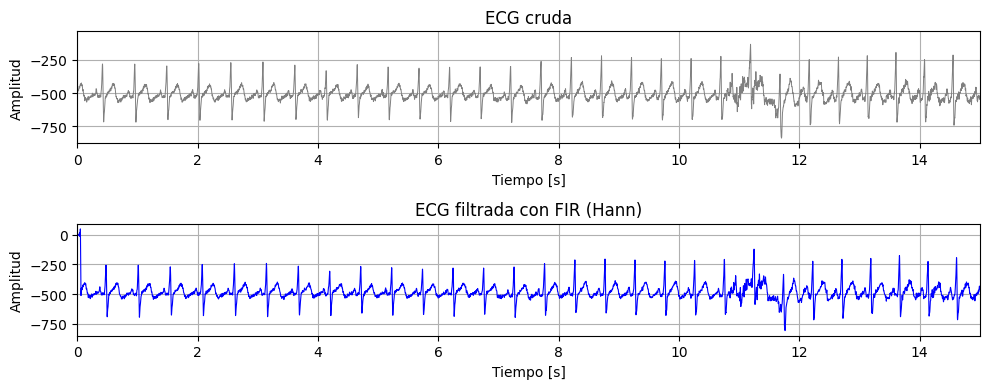

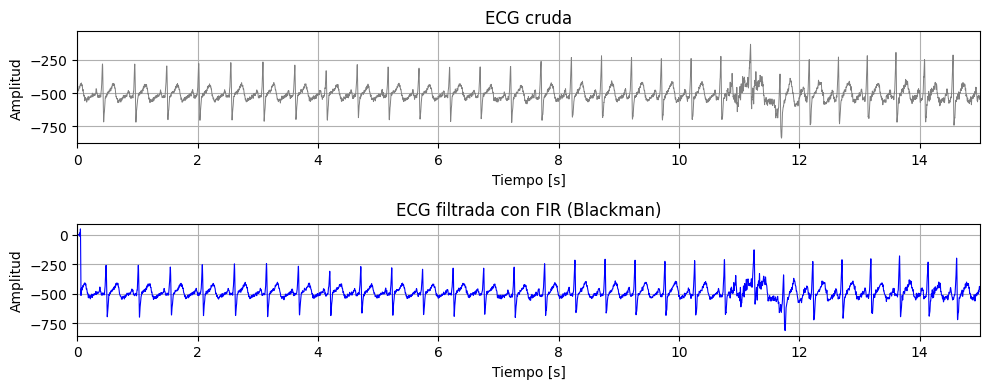

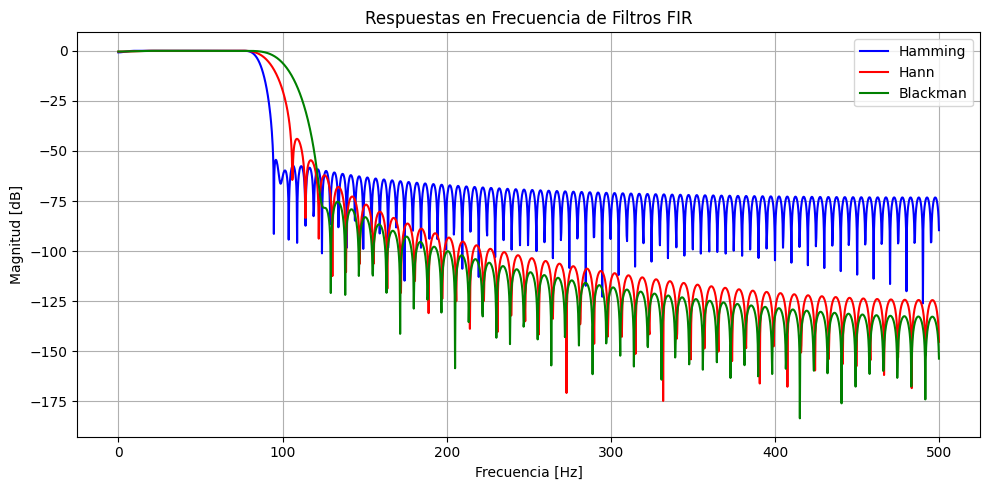

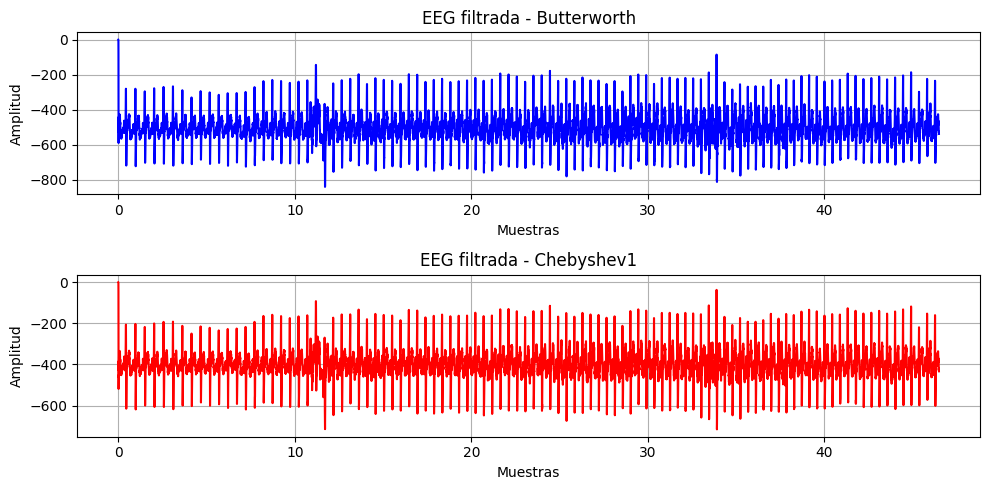

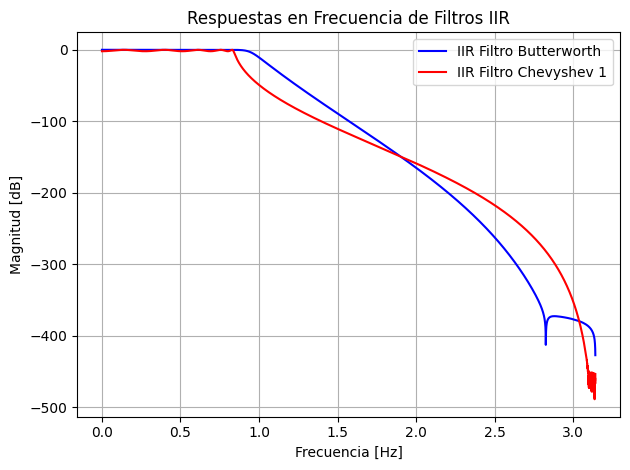

In [72]:
# Leer archivo de señal
with open("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/actividad_aerobica_1.txt", "r") as f:
    lineas = f.readlines()
datos = np.array([line.strip().split() for line in lineas if not line.startswith("#")], dtype=float)

ecg = datos[:, -1] * -1   # señal ECG
fs = 1000                 # frecuencia de muestreo
tiempo = np.arange(len(ecg)) / fs


#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
h = pd.read_csv(coef1, names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv(coef2, names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv(coef3, names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
ecg_filtrada = lfilter(h, 1.0, ecg)
# Filtrar señal con el FIR Hann
ecg_filtrada1 = lfilter(hann, 1.0, ecg)
# Filtrar señal con el FIR blackman
ecg_filtrada2 = lfilter(blackm, 1.0, ecg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, ecg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, ecg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 15)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EKG/IIR-CHEV1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
ecg_butter = lfilter(b1, a1, ecg)
ecg_chevy  = lfilter(b2, a2, ecg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, ecg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, ecg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## EEG
## 1. Estado Basal

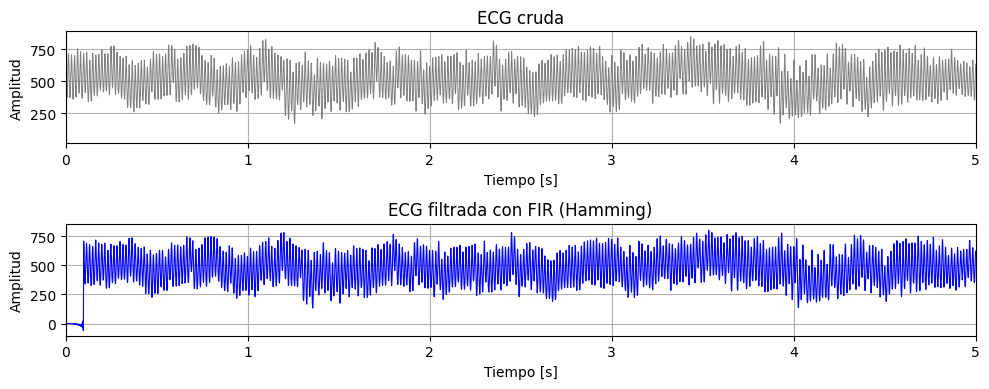

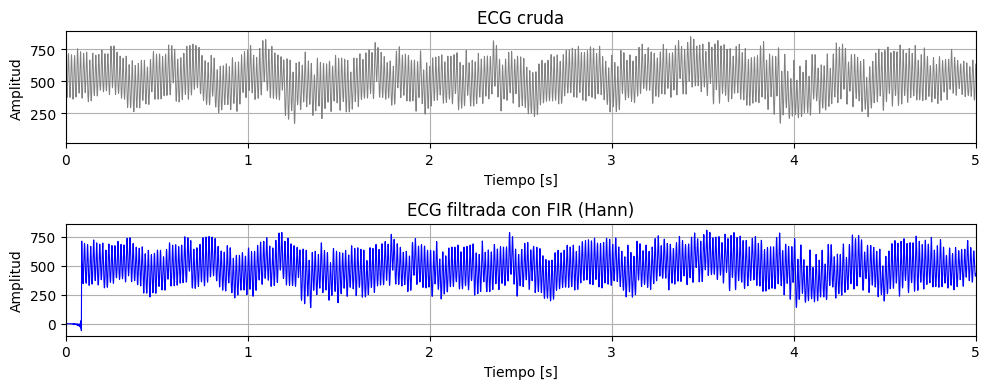

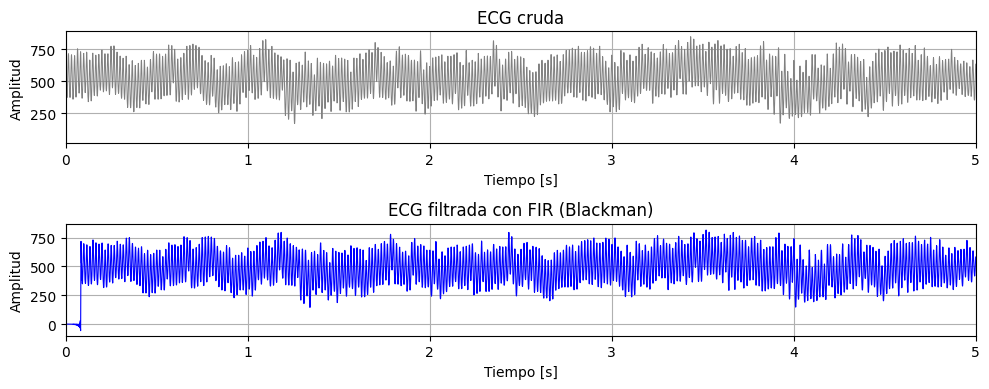

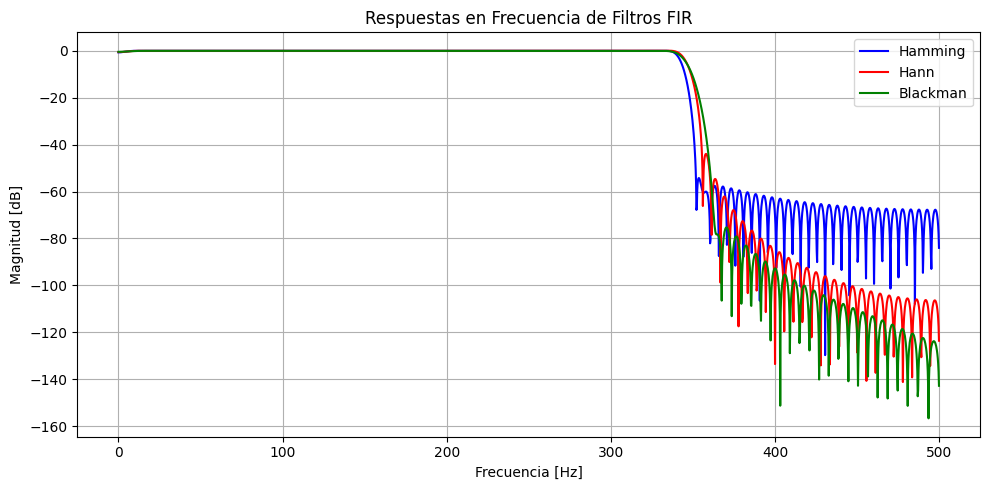

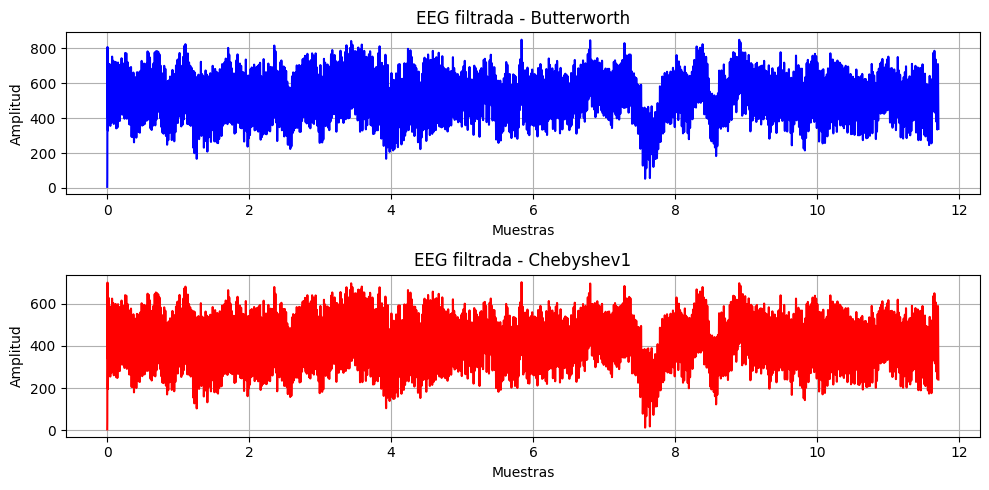

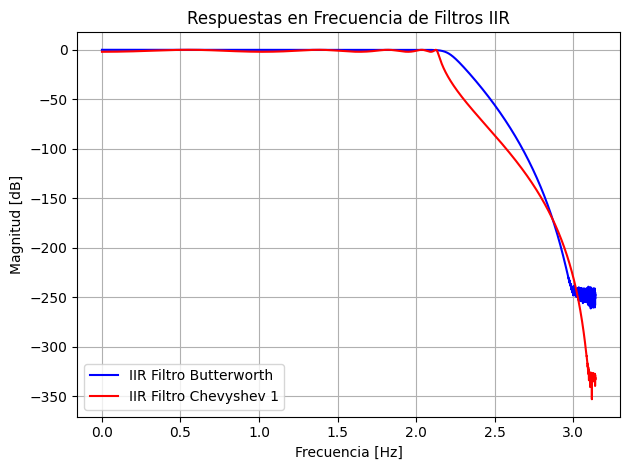

In [73]:
# Cargamos los datos del archivo .txt de OpenSignals
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/Basal.txt", delimiter=None, comments="#")
eeg = datos[:, 5] #La señal se encuentra en ña 5 columna

fs = 1000  
tiempo = np.arange(len(eeg)) / fs

#FILTROS FIR
#Trabajamos con filtros pasabandas de 0.5 a 100Hz para identificar las bandas de potencia
#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
h = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hamming.csv", names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hann.csv", names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Blackman.csv", names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
eeg_filtrada = lfilter(h, 1.0, eeg)
# Filtrar señal con el FIR Hann
eeg_filtrada1 = lfilter(hann, 1.0, eeg)
# Filtrar señal con el FIR blackman
eeg_filtrada2 = lfilter(blackm, 1.0, eeg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#########################################################################33
#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR-LP_Butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR_LP_Chevyshev1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
eeg_butter = lfilter(b1, a1, eeg)
eeg_chevy  = lfilter(b2, a2, eeg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, eeg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, eeg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## 2. Mirada Fija

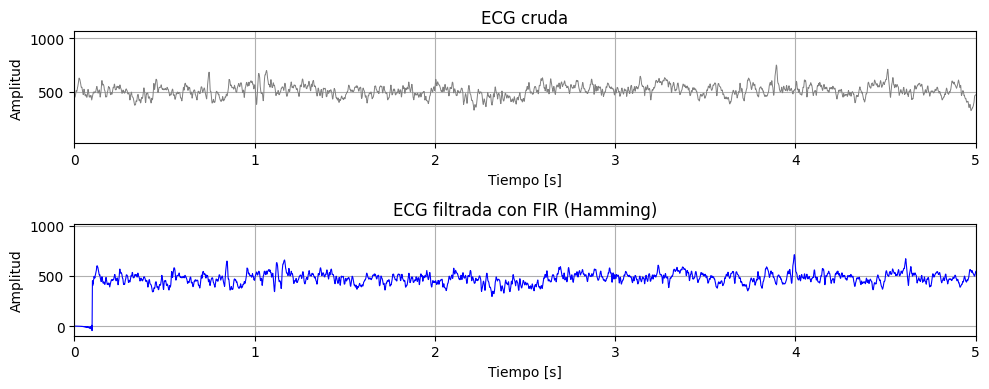

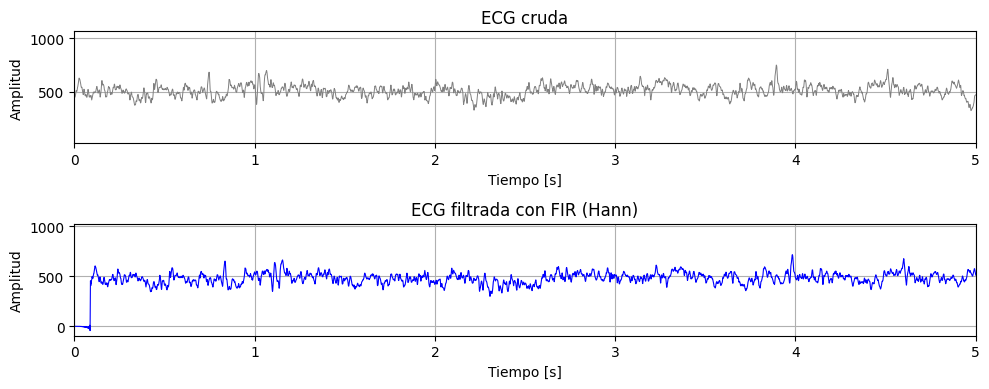

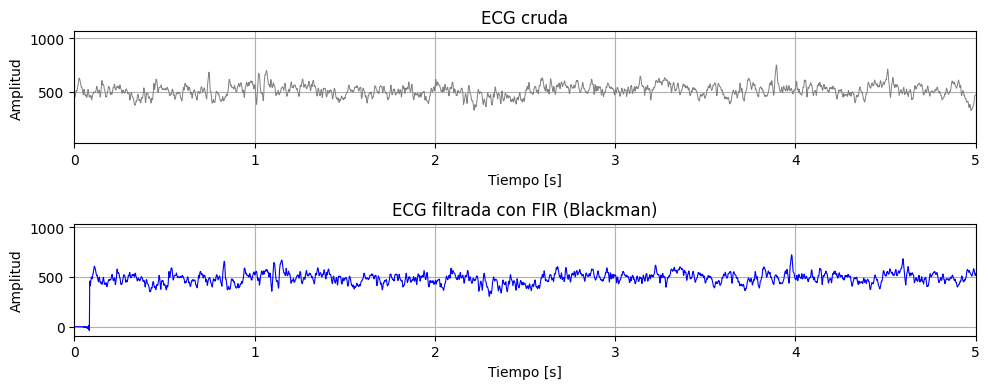

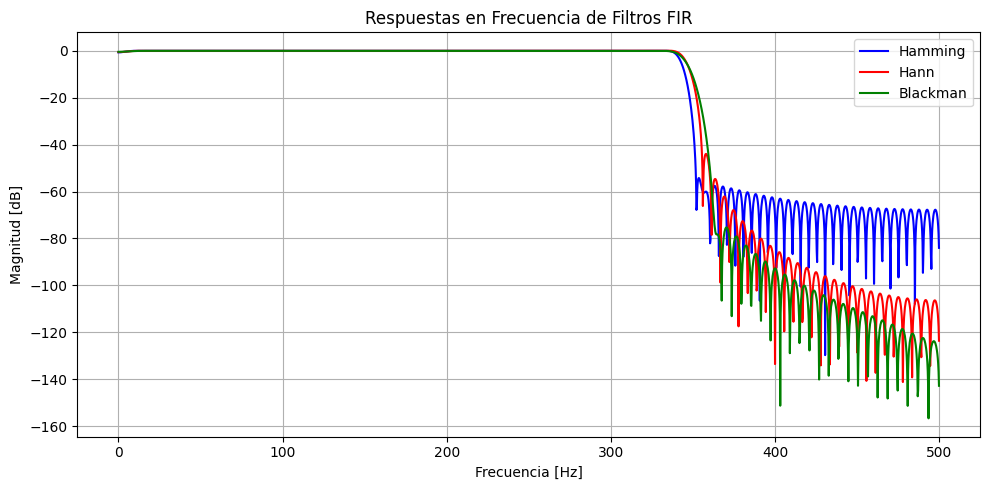

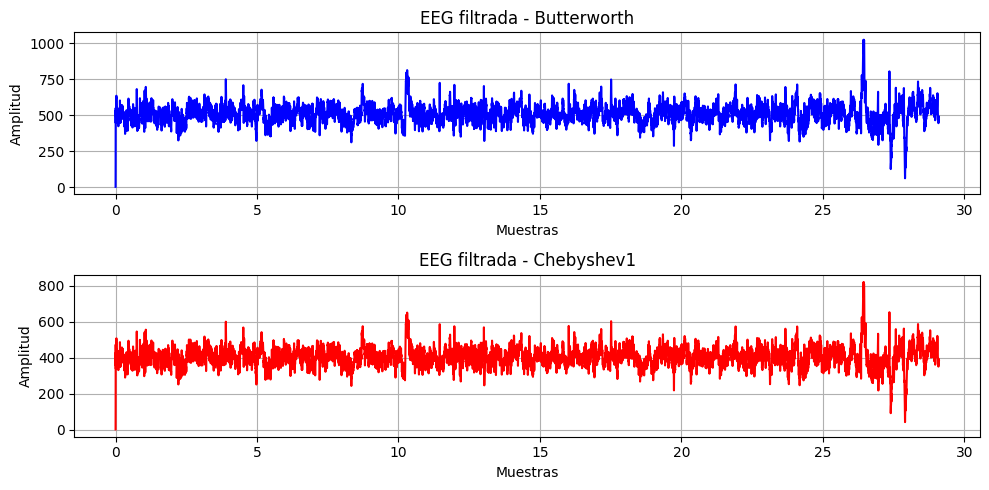

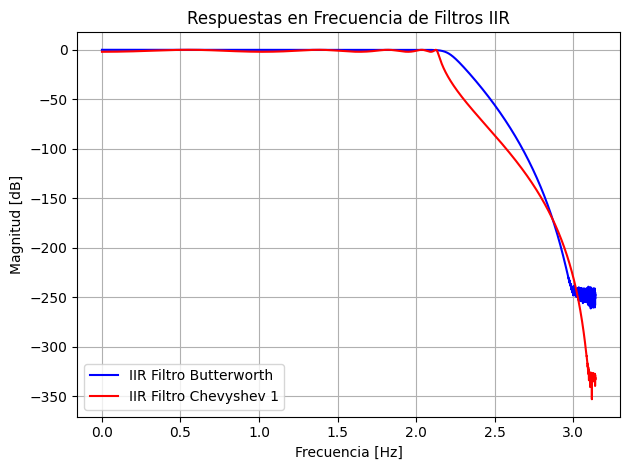

In [74]:
# Cargamos los datos del archivo .txt de OpenSignals
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/Fijar_mirada_2.txt", delimiter=None, comments="#")
eeg = datos[:, 5] #La señal se encuentra en ña 5 columna

fs = 1000  
tiempo = np.arange(len(eeg)) / fs

#FILTROS FIR
#Trabajamos con filtros pasabandas de 0.5 a 100Hz para identificar las bandas de potencia
#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
h = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hamming.csv", names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hann.csv", names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Blackman.csv", names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
eeg_filtrada = lfilter(h, 1.0, eeg)
# Filtrar señal con el FIR Hann
eeg_filtrada1 = lfilter(hann, 1.0, eeg)
# Filtrar señal con el FIR blackman
eeg_filtrada2 = lfilter(blackm, 1.0, eeg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#########################################################################33
#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR-LP_Butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR_LP_Chevyshev1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
eeg_butter = lfilter(b1, a1, eeg)
eeg_chevy  = lfilter(b2, a2, eeg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, eeg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, eeg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## 3. Preguntas

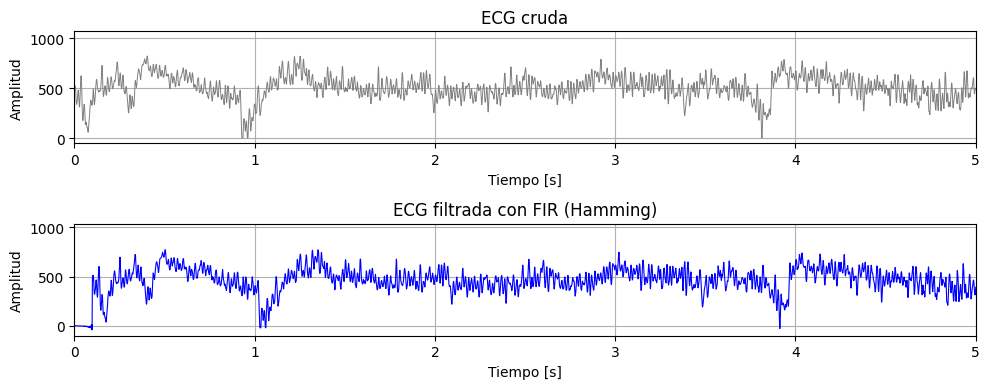

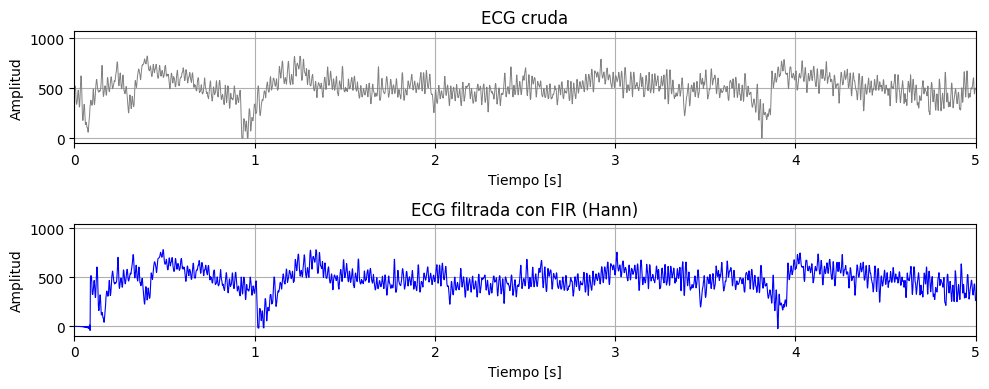

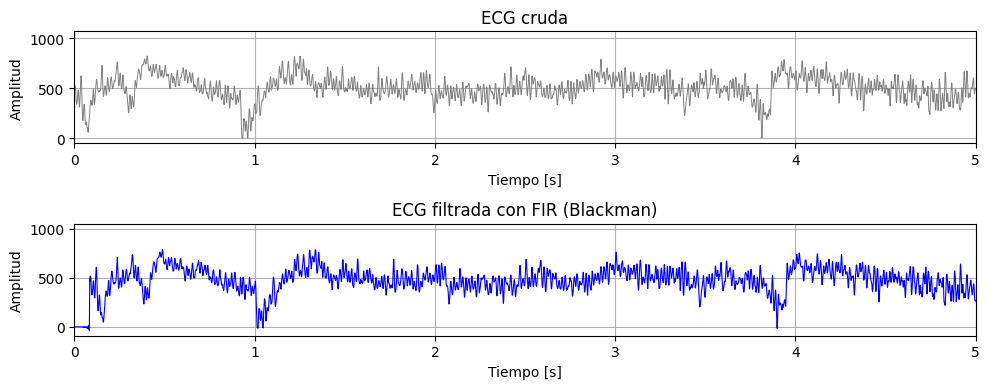

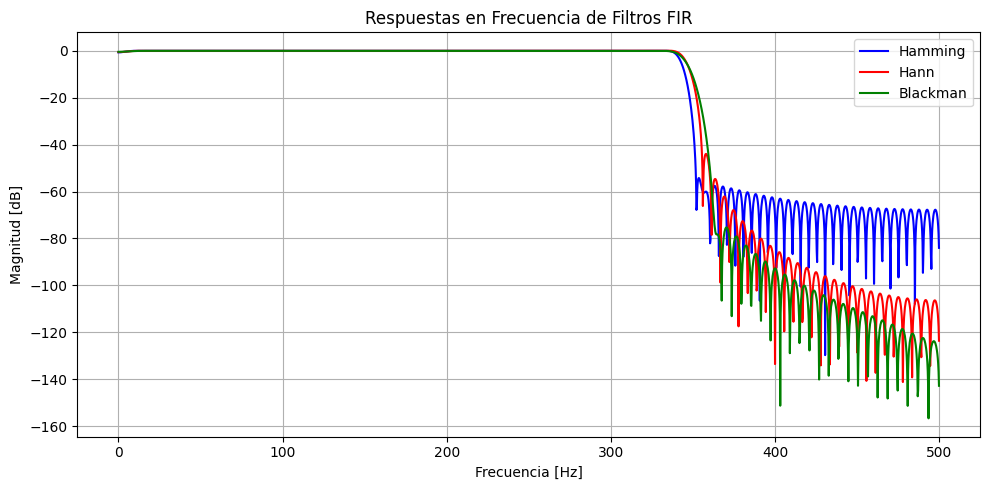

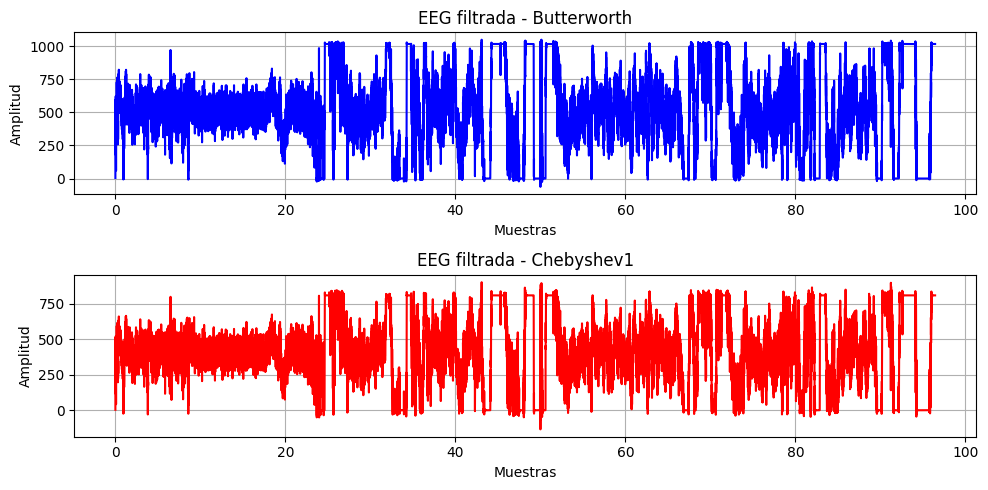

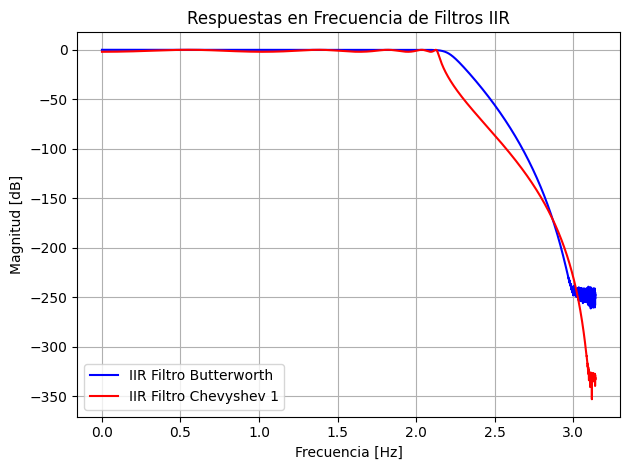

In [75]:
# Cargamos los datos del archivo .txt de OpenSignals
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/preguntas.txt", delimiter=None, comments="#")
eeg = datos[:, 5] #La señal se encuentra en ña 5 columna

fs = 1000  
tiempo = np.arange(len(eeg)) / fs

#FILTROS FIR
#Trabajamos con filtros pasabandas de 0.5 a 100Hz para identificar las bandas de potencia
#con worN definimos la resolucion
# Cargar coeficientes FIR - Hamming
h = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hamming.csv", names=["h"])["h"].to_numpy()
w_ham, H_ham = freqz(h, worN=2048, fs=fs)
# Cargar coeficientes FIR - Hann
hann = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Hann.csv", names=["hann"])["hann"].to_numpy()
w_hann, H_hann = freqz(hann, worN=2048, fs=fs)
# Cargar coeficientes FIR - Blackman
blackm = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/FIR_Blackman.csv", names=["blackm"])["blackm"].to_numpy()
w_blackm, H_blackm = freqz(blackm, worN=2048, fs=fs)


# Filtrar señal con el FIR Hamming 
eeg_filtrada = lfilter(h, 1.0, eeg)
# Filtrar señal con el FIR Hann
eeg_filtrada1 = lfilter(hann, 1.0, eeg)
# Filtrar señal con el FIR blackman
eeg_filtrada2 = lfilter(blackm, 1.0, eeg)


# Ploteo de señal cruda vs filtrada-HAMMING
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hamming)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Hann
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada1, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Hann)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()


# Ploteo de señal cruda vs filtrada-Blackman
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(tiempo, eeg, 'gray', linewidth=0.7)
plt.title("ECG cruda")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(tiempo, eeg_filtrada2, 'blue', linewidth=0.8)
plt.title("ECG filtrada con FIR (Blackman)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, 5)
plt.grid()
plt.tight_layout()
plt.show()

# Respuesta en frecuencia de los 3 enventanamientos
plt.figure(figsize=(10, 5))

plt.plot(w_ham, 20*np.log10(np.abs(H_ham)), 'b', label="Hamming")
plt.plot(w_hann, 20*np.log10(np.abs(H_hann)), 'r', label="Hann")
plt.plot(w_blackm, 20*np.log10(np.abs(H_blackm)), 'g', label="Blackman")

plt.title("Respuestas en Frecuencia de Filtros FIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#########################################################################33
#FILTROS IIR
#Butterworth
iir1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR-LP_Butterworth.csv", header=None)
b1 = iir1[0].to_numpy()
a1 = iir1[1].to_numpy()
w1_iir, H1_iir = freqz(b1,a1, worN=8000)
#Chevyshev1
iir2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EEG/IIR_LP_Chevyshev1.csv", header=None)
b2 = iir2[0].to_numpy()
a2 = iir2[1].to_numpy()
w2_iir, H2_iir = freqz(b2,a2, worN=8000)

#Filtramos la señal
eeg_butter = lfilter(b1, a1, eeg)
eeg_chevy  = lfilter(b2, a2, eeg)


plt.figure(figsize=(10, 5))
# Butterworth
plt.subplot(2,1,1)
plt.plot(tiempo, eeg_butter, 'b')
plt.title("EEG filtrada - Butterworth")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
# Chebyshev1
plt.subplot(2,1,2)
plt.plot(tiempo, eeg_chevy, 'r')
plt.title("EEG filtrada - Chebyshev1")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#Respuestas en freceuncia
plt.plot(w1_iir, 20*np.log10(np.abs(H1_iir)), 'b', label="IIR Filtro Butterworth")
plt.plot(w2_iir, 20*np.log10(np.abs(H2_iir)), 'r', label="IIR Filtro Chevyshev 1")

plt.title("Respuestas en Frecuencia de Filtros IIR")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## EMG
## 1. Reposo Biceps

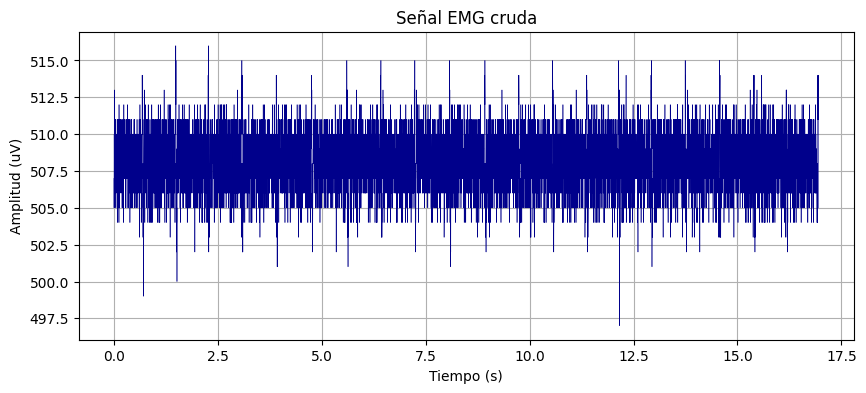

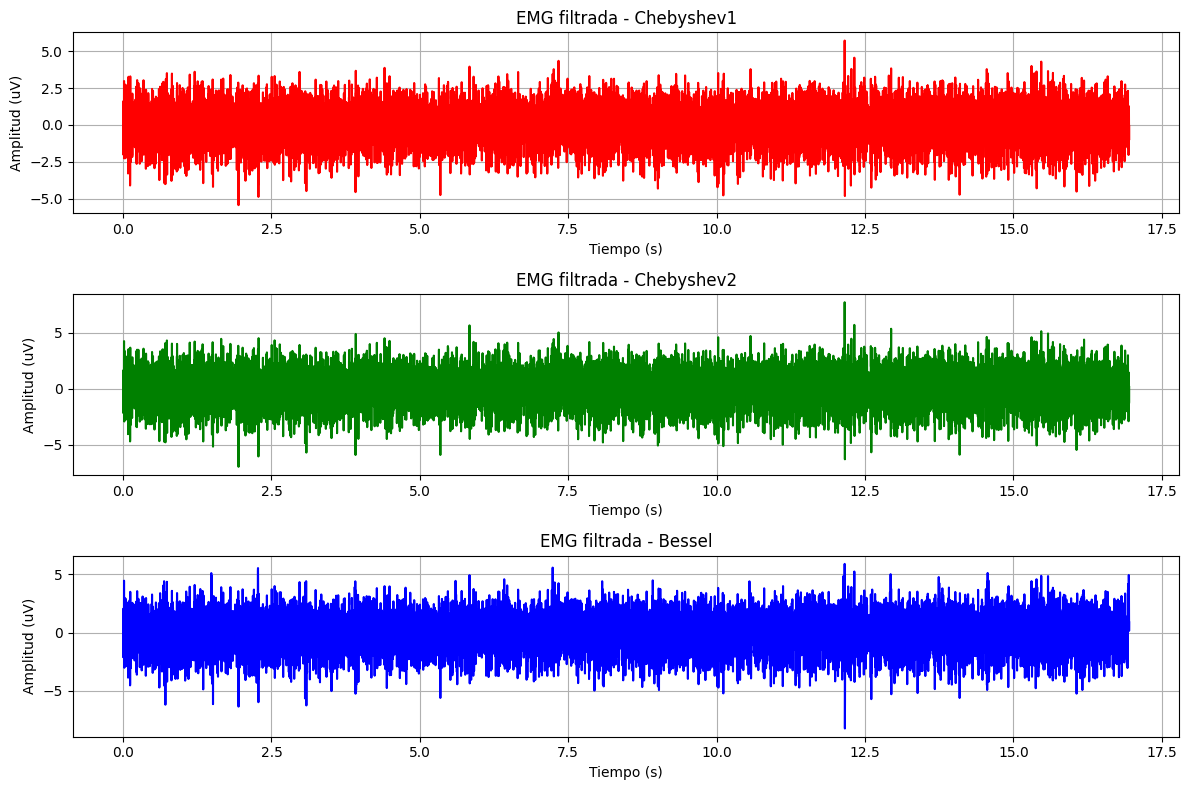

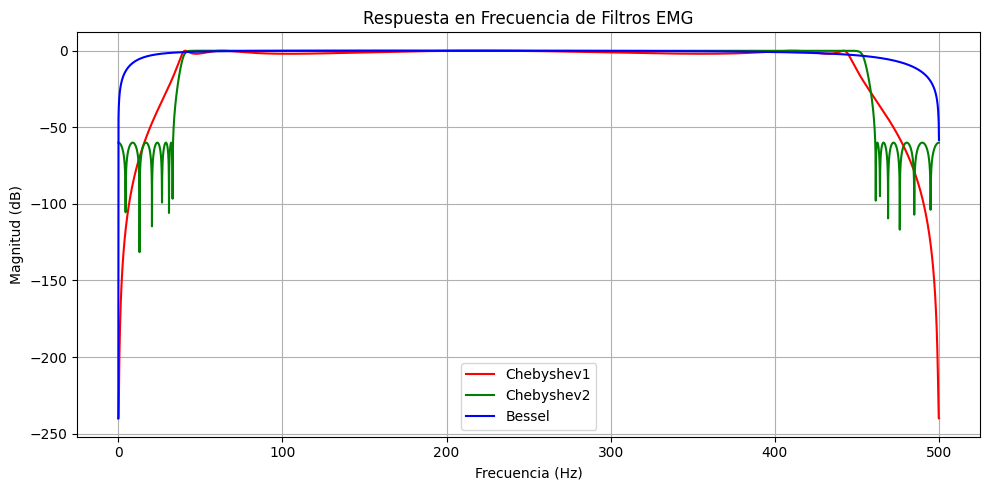

In [76]:
# Cargamos el archivo EMG
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/reposo1_biceps.txt", comments="#")
emg = datos[:, -1]
fs = 1000
tiempo = np.linspace(0, len(emg) / fs, len(emg))

# Coeficientes
chev1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev1.csv", header=None)
b_chev1, a_chev1 = chev1[0].to_numpy(), chev1[1].to_numpy()
chev2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev2.csv", header=None)
b_chev2, a_chev2 = chev2[0].to_numpy(), chev2[1].to_numpy()
bessel = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/bessel.csv", header=None)
b_bessel, a_bessel = bessel[0].to_numpy(), bessel[1].to_numpy()

# Filtrado usando filtfilt
emg_chev1 = filtfilt(b_chev1, a_chev1, emg)
emg_chev2 = filtfilt(b_chev2, a_chev2, emg)
emg_bessel = filtfilt(b_bessel, a_bessel, emg)

# Señal cruda
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Señales filtradas
plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(tiempo, emg_chev1, 'r')
plt.title("EMG filtrada - Chebyshev1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(tiempo, emg_chev2, 'g')
plt.title("EMG filtrada - Chebyshev2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(tiempo, emg_bessel, 'b')
plt.title("EMG filtrada - Bessel")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Respuesta en frecuencia
w1, H1 = freqz(b_chev1, a_chev1, worN=8000)
w2, H2 = freqz(b_chev2, a_chev2, worN=8000)
w3, H3 = freqz(b_bessel, a_bessel, worN=8000)

freq1, freq2, freq3 = w1*fs/(2*np.pi), w2*fs/(2*np.pi), w3*fs/(2*np.pi)
eps = 1e-12

plt.figure(figsize=(10, 5))
plt.plot(freq1, 20*np.log10(np.abs(H1)+eps), 'r', label="Chebyshev1")
plt.plot(freq2, 20*np.log10(np.abs(H2)+eps), 'g', label="Chebyshev2")
plt.plot(freq3, 20*np.log10(np.abs(H3)+eps), 'b', label="Bessel")
plt.title("Respuesta en Frecuencia de Filtros EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Movimiento leve de  Biceps

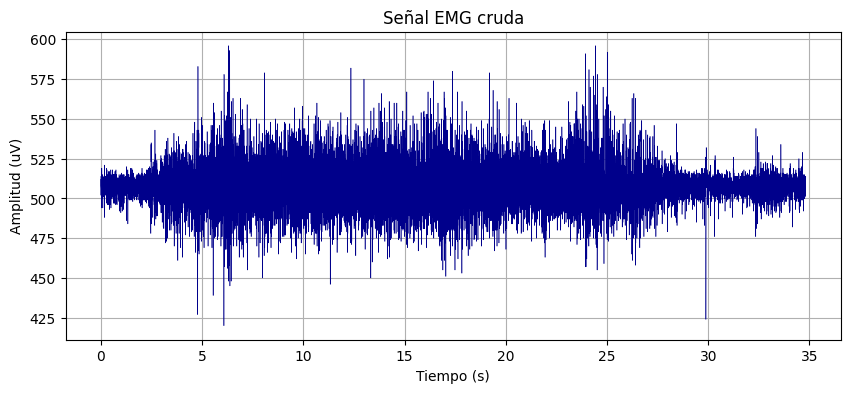

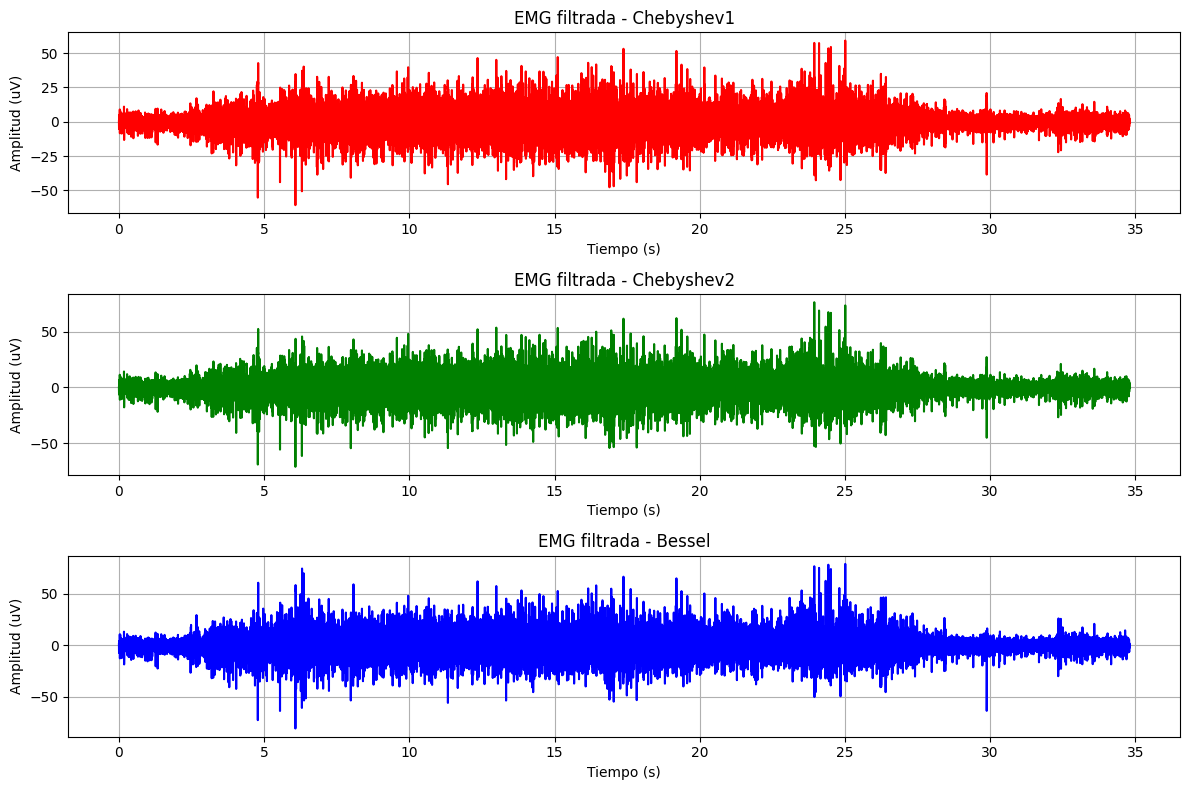

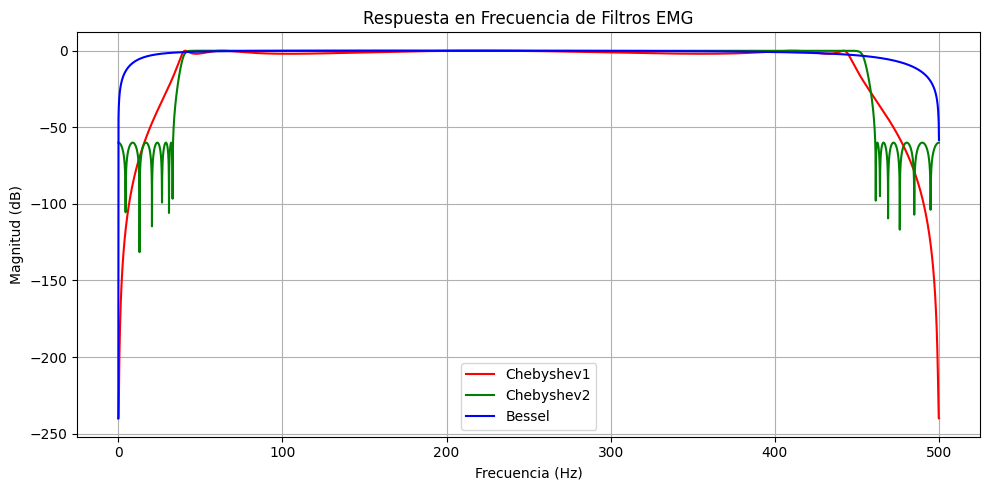

In [77]:
# Cargamos el archivo EMG
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/leve1_biceps.txt", comments="#")
emg = datos[:, -1]
fs = 1000
tiempo = np.linspace(0, len(emg) / fs, len(emg))

# Coeficientes
chev1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev1.csv", header=None)
b_chev1, a_chev1 = chev1[0].to_numpy(), chev1[1].to_numpy()
chev2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev2.csv", header=None)
b_chev2, a_chev2 = chev2[0].to_numpy(), chev2[1].to_numpy()
bessel = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/bessel.csv", header=None)
b_bessel, a_bessel = bessel[0].to_numpy(), bessel[1].to_numpy()

# Filtrado usando filtfilt
emg_chev1 = filtfilt(b_chev1, a_chev1, emg)
emg_chev2 = filtfilt(b_chev2, a_chev2, emg)
emg_bessel = filtfilt(b_bessel, a_bessel, emg)

# Señal cruda
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Señales filtradas
plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(tiempo, emg_chev1, 'r')
plt.title("EMG filtrada - Chebyshev1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(tiempo, emg_chev2, 'g')
plt.title("EMG filtrada - Chebyshev2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(tiempo, emg_bessel, 'b')
plt.title("EMG filtrada - Bessel")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Respuesta en frecuencia
w1, H1 = freqz(b_chev1, a_chev1, worN=8000)
w2, H2 = freqz(b_chev2, a_chev2, worN=8000)
w3, H3 = freqz(b_bessel, a_bessel, worN=8000)

freq1, freq2, freq3 = w1*fs/(2*np.pi), w2*fs/(2*np.pi), w3*fs/(2*np.pi)
eps = 1e-12

plt.figure(figsize=(10, 5))
plt.plot(freq1, 20*np.log10(np.abs(H1)+eps), 'r', label="Chebyshev1")
plt.plot(freq2, 20*np.log10(np.abs(H2)+eps), 'g', label="Chebyshev2")
plt.plot(freq3, 20*np.log10(np.abs(H3)+eps), 'b', label="Bessel")
plt.title("Respuesta en Frecuencia de Filtros EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Aplicando fuerza

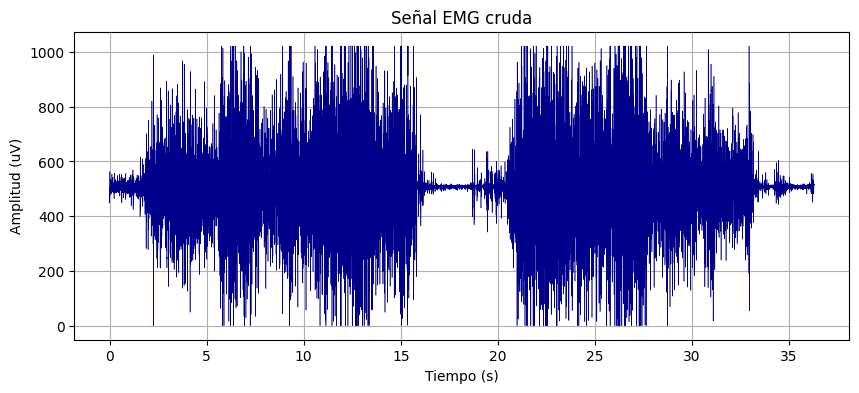

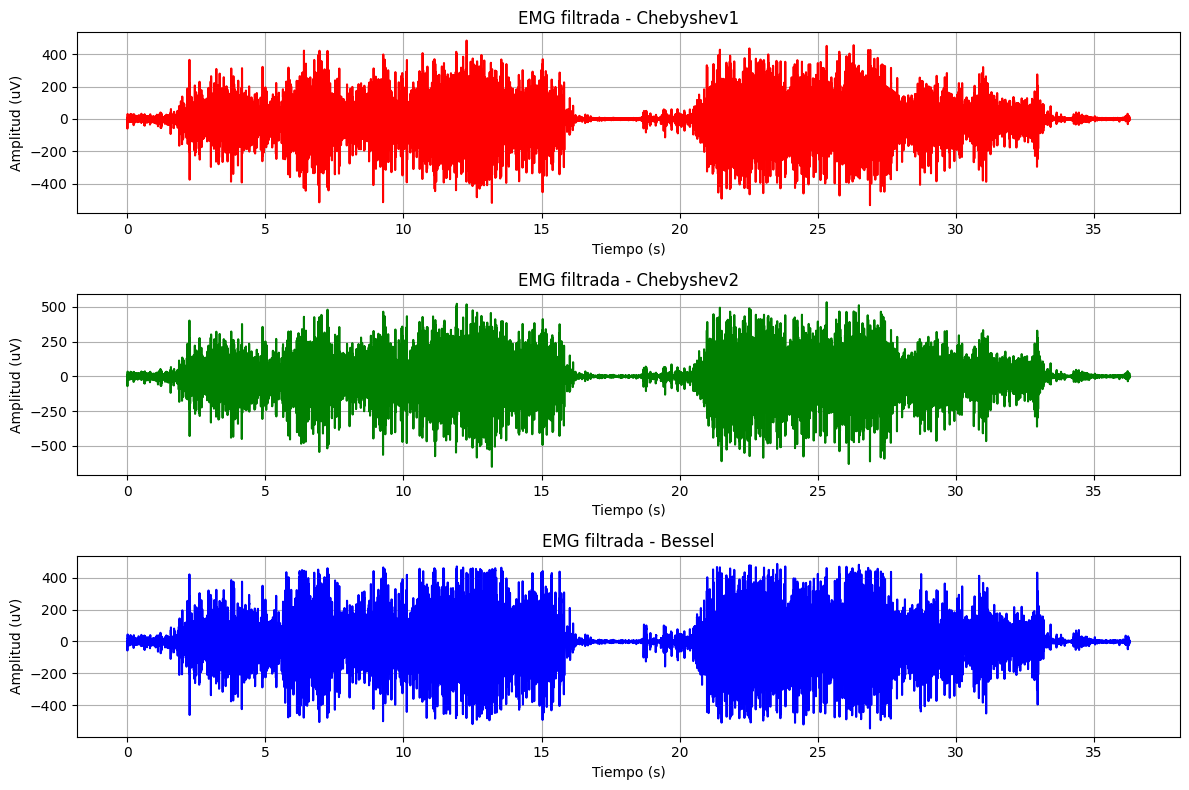

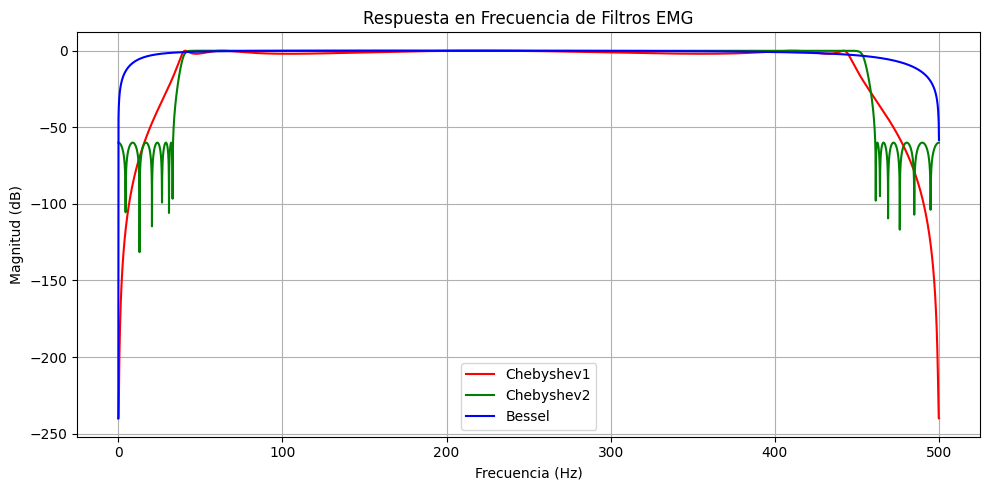

In [78]:
# Cargamos el archivo EMG
datos = np.loadtxt("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/fuerza1_biceps.txt", comments="#")
emg = datos[:, -1]
fs = 1000
tiempo = np.linspace(0, len(emg) / fs, len(emg))

# Coeficientes
chev1 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev1.csv", header=None)
b_chev1, a_chev1 = chev1[0].to_numpy(), chev1[1].to_numpy()
chev2 = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/chev2.csv", header=None)
b_chev2, a_chev2 = chev2[0].to_numpy(), chev2[1].to_numpy()
bessel = pd.read_csv("D:/CICLO 2025- II/ISB/Lab Filtros Digitales/Laboratorio 7- Filtros FIR IIR/Señales EMG/bessel.csv", header=None)
b_bessel, a_bessel = bessel[0].to_numpy(), bessel[1].to_numpy()

# Filtrado usando filtfilt
emg_chev1 = filtfilt(b_chev1, a_chev1, emg)
emg_chev2 = filtfilt(b_chev2, a_chev2, emg)
emg_bessel = filtfilt(b_bessel, a_bessel, emg)

# Señal cruda
plt.figure(figsize=(10, 4))
plt.plot(tiempo, emg, color="#00008B", linewidth=0.4)
plt.title("Señal EMG cruda")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid()
plt.show()

# Señales filtradas
plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(tiempo, emg_chev1, 'r')
plt.title("EMG filtrada - Chebyshev1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(tiempo, emg_chev2, 'g')
plt.title("EMG filtrada - Chebyshev2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(tiempo, emg_bessel, 'b')
plt.title("EMG filtrada - Bessel")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Respuesta en frecuencia
w1, H1 = freqz(b_chev1, a_chev1, worN=8000)
w2, H2 = freqz(b_chev2, a_chev2, worN=8000)
w3, H3 = freqz(b_bessel, a_bessel, worN=8000)

freq1, freq2, freq3 = w1*fs/(2*np.pi), w2*fs/(2*np.pi), w3*fs/(2*np.pi)
eps = 1e-12

plt.figure(figsize=(10, 5))
plt.plot(freq1, 20*np.log10(np.abs(H1)+eps), 'r', label="Chebyshev1")
plt.plot(freq2, 20*np.log10(np.abs(H2)+eps), 'g', label="Chebyshev2")
plt.plot(freq3, 20*np.log10(np.abs(H3)+eps), 'b', label="Bessel")
plt.title("Respuesta en Frecuencia de Filtros EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

